<a href="https://colab.research.google.com/github/HarsikaVetrivel/PYTHONAIML/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9025 - loss: 0.3236 - val_accuracy: 0.9838 - val_loss: 0.0484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9859 - val_loss: 0.0418
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9903 - loss: 0.0325 - val_accuracy: 0.9895 - val_loss: 0.0331
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9916 - val_loss: 0.0270
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9906 - val_loss: 0.0321
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0387
Test accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


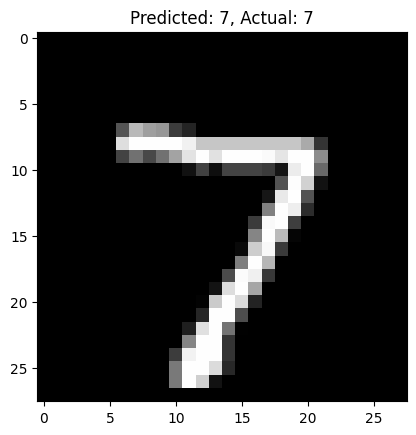

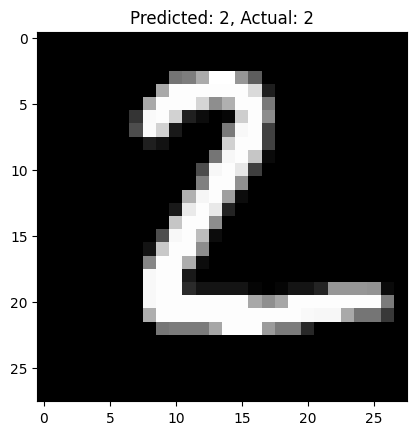

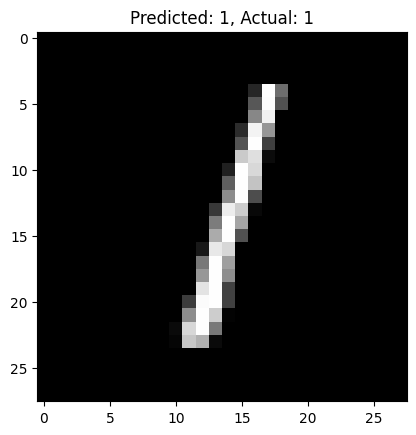

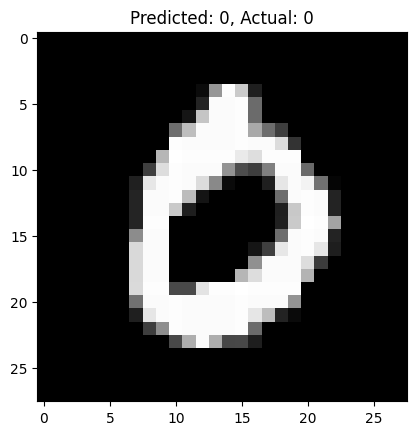

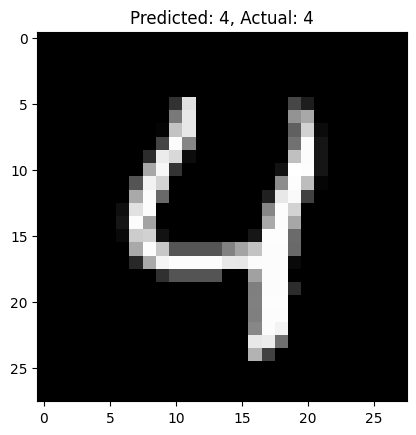

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset (MNIST: 28x28 grayscale images of digits 0–9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 to 0-1) and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Predict a sample image
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
    plt.show()
